In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df17c = pd.read_csv(os.path.join('df17.csv'))
del df17c['Unnamed: 0']
del df17c['Year']
del df17c['Month']
del df17c['Day']
del df17c['Day_of_Week']
del df17c['Weekend']
del df17c['Datetime']

df17c.head()

,MW,Utility,Temp(f)
0,10500.0,COMED,35.6
1,12132.0,COMED,3.2
2,11711.0,COMED,3.2
3,11405.0,COMED,3.2
4,11235.0,COMED,1.4


In [3]:
df_2017pos = df17c[df17c['Temp(f)'] >= 60].copy()
df_2017neg = df17c[df17c['Temp(f)'] < 60].copy()

In [4]:
X = df_2017pos["Temp(f)"].values.reshape(-1, 1)
y = df_2017pos["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (3934, 1) (3934, 1)


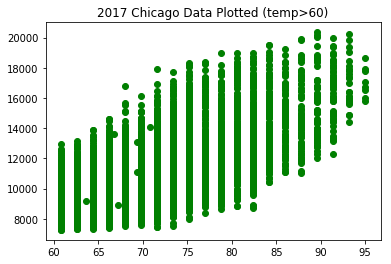

In [6]:
plt.scatter(X, y,color='g')
plt.title("2017 Chicago Data Plotted (temp>60)")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [8]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3932961876787241
Testing Score: 0.41549867443317967


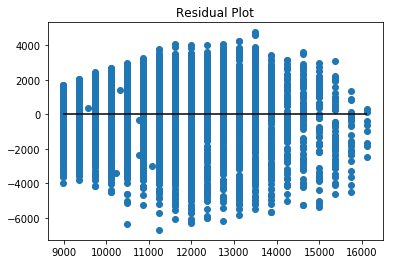

In [9]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

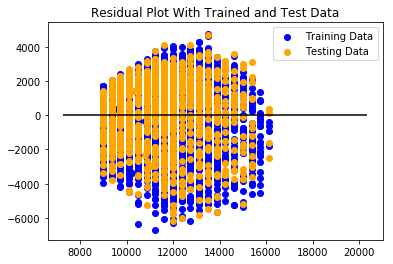

In [10]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [11]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[208.85872606]]
y-axis intercept:  [-3713.40083849]


In [12]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  -3713.40083849+ 208.85872606 * x_min
y_max = -3713.40083849+ 208.85872606 * x_max

Actual Min Value: 7263.0
Predicted Min Value: [[8985.20970576]]
Actual Max Value: 20351.0
Predicted Max Value: [[16128.17813689]]


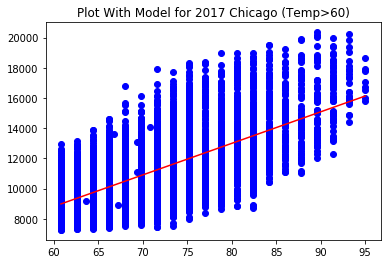

In [13]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2017 Chicago (Temp>60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [14]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [9390.]
Predicted output: [9737.10111956]
Prediction Error: [347.10111956]


In [16]:
X = df_2017neg["Temp(f)"].values.reshape(-1, 1)
y = df_2017neg["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (4781, 1) (4781, 1)


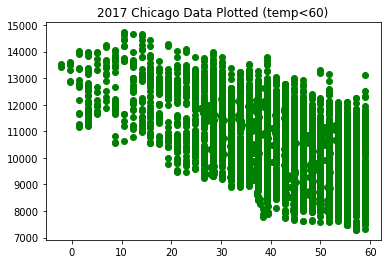

In [17]:
plt.scatter(X, y,color='g')
plt.title("2017 Chicago Data Plotted (temp>60)")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [27]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2564962113896603
Testing Score: 0.26034933448965203


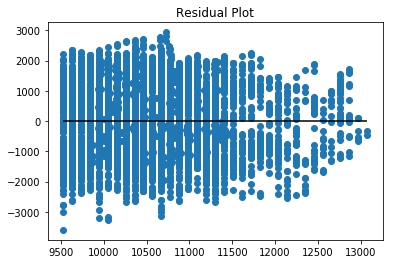

In [28]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

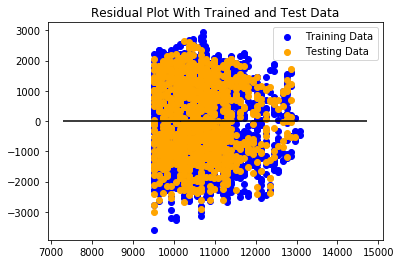

In [29]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [30]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-58.14531958]]
y-axis intercept:  [12950.72798366]


In [32]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  12950.72798366+ (-58.14531958 * x_min)
y_max = 12950.72798366+ (-58.14531958 * x_max)

Actual Min Value: 7286.0
Predicted Min Value: [[13078.64768673]]
Actual Max Value: 14730.0
Predicted Max Value: [[9520.15412855]]


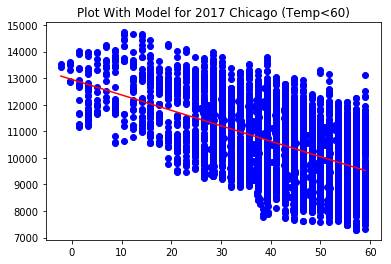

In [33]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2017 Chicago (Temp<60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [34]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [10500.]
Predicted output: [10880.75460668]
Prediction Error: [380.75460668]


In [35]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [36]:
modeldf

,Actual,Error,Predicted
0,10500.0,380.754607,10880.754607
1,12132.0,632.662961,12764.662961
2,11711.0,1053.662961,12764.662961
3,11405.0,1359.662961,12764.662961
4,11235.0,1634.324536,12869.324536
5,11145.0,1724.324536,12869.324536
6,11192.0,1572.662961,12764.662961
7,11288.0,1581.324536,12869.324536
8,11507.0,1257.662961,12764.662961
9,11554.0,1210.662961,12764.662961
